<a href="https://colab.research.google.com/github/KhanFaisa/Deep-Learning/blob/main/Regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression With Keras

## Step 1 : Read The Data Set

In [9]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target feature here is PE (Power Plant Energy output)
#### Step 2 : Perform Basic Data Quality checks

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [14]:
df.isna().sum()


AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [15]:
df.duplicated().sum()


41

In [16]:
df.duplicated().sum()/len(df)


0.004285117056856187

#### Step 3: Seperate X and Y(PE)


In [17]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [18]:
X.head()


,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [19]:
Y.head()


,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4: Create a Preprocessing Pipeline for X


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [21]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')


In [22]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


### Step 5: Apply train test split


In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)



In [26]:
xtrain.head()


,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [27]:
ytrain.head()


,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [28]:
xtest.head()


,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [ ]:
ytest.head()


,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


#### Step 5: Build the Keras neural network


In [29]:
xtrain.shape[1]


4

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Input


In [31]:
# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))

In [32]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])


In [34]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)


Epoch 1/100
192/192 [==============================] - 4s 5ms/step - loss: 206370.0469 - mae: 453.9692 - val_loss: 204203.8125 - val_mae: 451.6103
Epoch 2/100
192/192 [==============================] - 1s 5ms/step - loss: 201767.9062 - mae: 448.9477 - val_loss: 196435.3750 - val_mae: 443.0359
Epoch 3/100
192/192 [==============================] - 1s 5ms/step - loss: 187187.5938 - mae: 432.4368 - val_loss: 173944.6719 - val_mae: 416.8697
Epoch 4/100
192/192 [==============================] - 1s 4ms/step - loss: 156238.8438 - mae: 394.1897 - val_loss: 136492.3281 - val_mae: 367.3303
Epoch 5/100
192/192 [==============================] - 1s 3ms/step - loss: 115249.0859 - mae: 333.9293 - val_loss: 95623.2656 - val_mae: 299.1840
Epoch 6/100
192/192 [==============================] - 1s 4ms/step - loss: 77713.8828 - mae: 262.3907 - val_loss: 64060.0117 - val_mae: 231.7872
Epoch 7/100
192/192 [==============================] - 1s 4ms/step - loss: 51977.4219 - mae: 204.8550 - val_loss: 44139.0

### Evaluate The Model In Train & Test


In [35]:
model.evaluate(xtrain, ytrain)


240/240 [==============================] - 1s 4ms/step - loss: 20.0350 - mae: 3.5613


[20.034984588623047, 3.5612990856170654]

In [37]:
model.evaluate(xtest, ytest)


60/60 [==============================] - 0s 2ms/step - loss: 18.9649 - mae: 3.4854


[18.96491241455078, 3.4854447841644287]

### Plot The Learning Curve

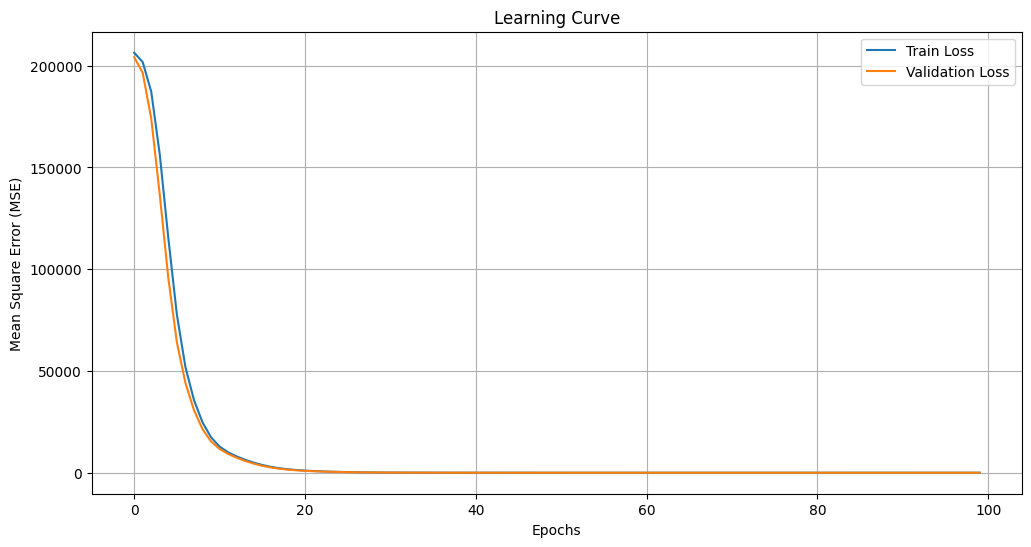

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

### Predict The Model Results  For Train & Test

In [39]:

ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 3ms/step


In [40]:
ypred_train[0:5]


array([[442.14246],
       [435.40686],
       [434.33575],
       [428.7134 ],
       [432.7035 ]], dtype=float32)

In [41]:
ytrain.head()


,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [42]:
ypred_test[0:5]


array([[436.5656 ],
       [437.12714],
       [461.2544 ],
       [476.30017],
       [436.6749 ]], dtype=float32)

In [43]:
ytest.head()


,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


### Perform Detailed Evaluation

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [47]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 Score : {r2:.4f}')



In [48]:
evaluate_model(model, xtrain, ytrain)


240/240 [==============================] - 0s 1ms/step
Mean Squared Error : 20.03
Root Mean Squared Error : 4.48
Mean Absolute Error : 3.56
R2 Score : 0.9315


In [49]:
evaluate_model(model, xtest, ytest)


60/60 [==============================] - 1s 8ms/step
Mean Squared Error : 18.96
Root Mean Squared Error : 4.35
Mean Absolute Error : 3.49
R2 Score : 0.9337


### R2 Score In Test Is 0.9336 > 0.8 Hence Above Model is Very Good

### Saving Above Model (.keras)

In [50]:
model.save('PowerOutput.keras')

### Load The Above Model

In [53]:
from keras.models import load_model

In [54]:
m = load_model('/content/PowerOutput.keras')

In [55]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
m.weights


[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[-0.21601048,  0.86981124,  0.17084254, -0.9465479 , -0.6270401 ,
         -1.1300744 , -0.1410494 ,  1.1245371 ],
        [-0.44624668,  1.3110036 , -0.72331256, -0.534864  ,  0.26291534,
         -0.5755838 , -0.94374615,  1.5599716 ],
        [ 0.19752672, -0.1831459 ,  0.1164752 , -0.01878336,  0.33338696,
         -0.17338957,  0.10424723, -0.3366672 ],
        [ 0.7629615 ,  0.2589971 ,  0.8471342 ,  0.12671034,  0.6835742 ,
         -1.1407866 , -0.96226454, -0.66366965]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([3.5119076, 4.128532 , 3.2802722, 3.125916 , 3.1830347, 3.5610764,
        3.1590161, 3.3301563], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 2.2333348 , -0.5863202 ,  0.7159682 ,  2.1883092 ],
        [ 2.3183227 , -0.84174734, -4.278023  ,  2.6002886 ],
        [ 2.7553995 ,  0.25545081,  1.017611  , 